# Computer Vision and Object Detection

Computer vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모 입니다.
네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [1]:
import requests

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.

matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [3]:
import json

Subscription Key와 접속에 필요한 URL을 설정합니다.

In [4]:
subscription_key = '234a97e32f8447c19fbf3836053ff32c'

In [5]:
vision_base_url = 'https://daeguaivision00.cognitiveservices.azure.com/vision/v2.0/'

In [6]:
analyze_url = vision_base_url + 'analyze'

In [7]:
image_url = 'https://t1.daumcdn.net/cfile/blog/99DA16365CA6A1A431'

In [8]:
response = requests.get(image_url)

In [9]:
image = Image.open(BytesIO(response.content))

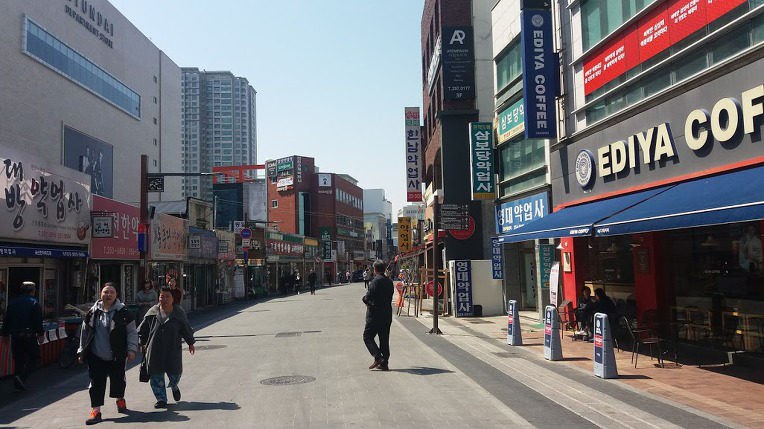

In [10]:
image

In [12]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key }
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [13]:
response = requests.post(analyze_url, headers=headers, params=params, json=data)

In [14]:
analysis = response.json()

분석 결과 입니다. 분석결과에는 랜드마크를 비롯해서 인지한 개체들과 문장으로 구성된 결과가 포함 되어 있습니다.

In [15]:
analysis

{'categories': [{'name': 'outdoor_street',
   'score': 0.75390625,
   'detail': {'landmarks': []}}],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'Grey',
  'dominantColors': ['Grey', 'Black', 'White'],
  'accentColor': 'AB2022',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['outdoor',
   'building',
   'road',
   'street',
   'city',
   'walking',
   'sidewalk',
   'people',
   'standing',
   'woman',
   'man',
   'bus',
   'store',
   'holding',
   'busy',
   'riding',
   'large',
   'tall',
   'group',
   'platform',
   'train',
   'parked',
   'sign'],
  'captions': [{'text': 'a group of people walking on a city street',
    'confidence': 0.9882235379553163}]},
 'requestId': 'a361e65f-0028-487d-8ea3-1de623081a8d',
 'metadata': {'height': 429, 'width': 764, 'format': 'Jpeg'}}

In [16]:
analysis['description']['captions'][0]['text']

'a group of people walking on a city street'

# Object Detection

In [17]:
objectDetection_url = vision_base_url + 'detect'

In [18]:
object_image = 'https://www.newsmin.co.kr/news/wp-content/uploads/2021/05/05180000dddd-1-1024x603.jpg'

In [22]:
img = Image.open(BytesIO(requests.get(object_image).content))

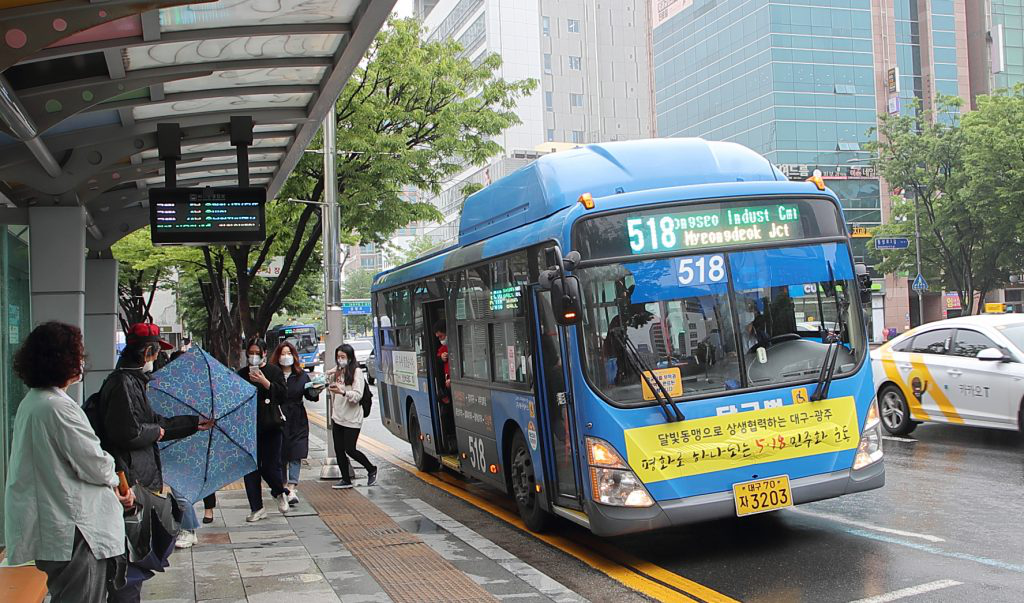

In [23]:
img

In [26]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
data = {'url' :object_image}

In [28]:
response = requests.post(objectDetection_url, headers = headers, json = data)

In [29]:
detectionResult = response.json()

In [30]:
detectionResult

{'objects': [{'rectangle': {'x': 251, 'y': 349, 'w': 50, 'h': 150},
   'object': 'person',
   'confidence': 0.534},
  {'rectangle': {'x': 322, 'y': 356, 'w': 47, 'h': 121},
   'object': 'person',
   'confidence': 0.52},
  {'rectangle': {'x': 876, 'y': 317, 'w': 145, 'h': 132},
   'object': 'taxi',
   'confidence': 0.559,
   'parent': {'object': 'car',
    'confidence': 0.852,
    'parent': {'object': 'Land vehicle',
     'confidence': 0.862,
     'parent': {'object': 'Vehicle', 'confidence': 0.862}}}},
  {'rectangle': {'x': 4, 'y': 325, 'w': 131, 'h': 276},
   'object': 'person',
   'confidence': 0.744},
  {'rectangle': {'x': 92, 'y': 325, 'w': 103, 'h': 266},
   'object': 'person',
   'confidence': 0.713},
  {'rectangle': {'x': 372, 'y': 141, 'w': 505, 'h': 404},
   'object': 'shuttle bus',
   'confidence': 0.921,
   'parent': {'object': 'bus',
    'confidence': 0.932,
    'parent': {'object': 'Land vehicle',
     'confidence': 0.941,
     'parent': {'object': 'Vehicle', 'confidence':

In [31]:
from PIL import Image, ImageDraw, ImageFont

In [37]:
draw = ImageDraw.Draw(img)

objects = detectionResult['objects']

for obj in objects:
    #print(obj)
    
    rect = obj['rectangle']
    
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']
    
    #사각형을 그리는 코드
    draw.rectangle(((x,y),(x+w,y+h)),outline='red')
    
    #글자를 입력하는 코드
    objectName = obj['object']
    draw.text((x,y), objectName, fill='red')

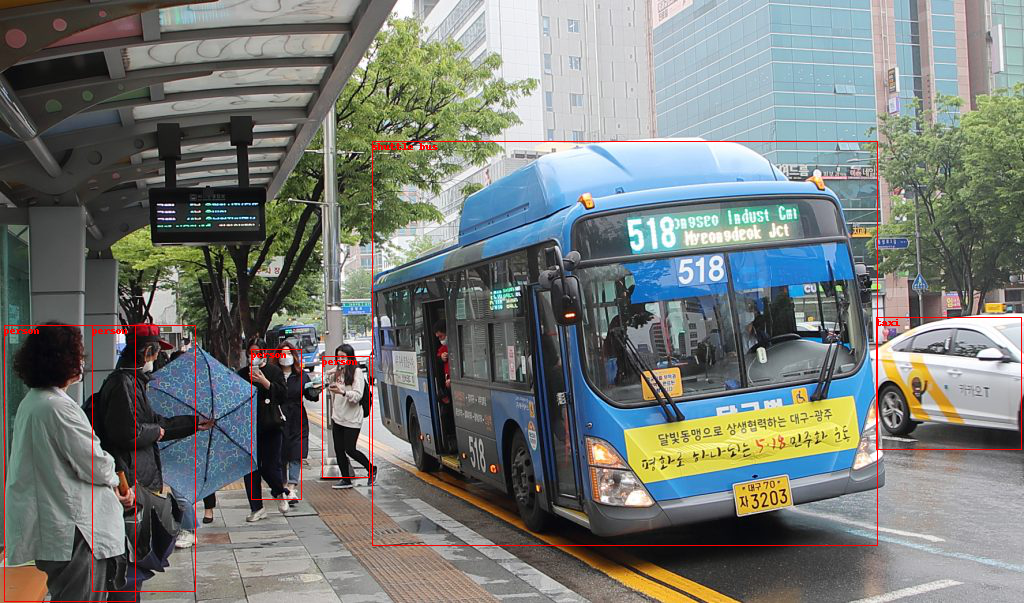

In [38]:
img